# Lesson 4: Image and Spectra Analysis 

## Image Analysis for Aerospace
Image analysis using Python plays a crucial role in both astronomy and aerospace sectors, providing valuable insights into celestial objects, spacecraft, and space missions. Here's how image analysis using Python is utilized in the sector:

- **Object Detection and Classification**: Python can be used to study astronomical images to classify various astronomical objects using machine learning 
- **Remote Sensing**: Python libraries can be employed to analyze pictures of the Earth's surface from satellites 
- **Planetary Exploration**: Imagery analysis are used for a wide range of planetary science research missions to study the surfaces of planets, moons, and asteroids.
- **Spectral Analysis and Photometry**: astronomers use spectral analysis in order to classify stars, galaxies, and other objects within space using their spectral signatures

![https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCE7CwpzbZgCeMSHF2HnjwoEYmmg10YrBLAhOYhJDMW8cd59r85O7ZQ6CHpcg1kGWVJCo&usqp=CAU](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCE7CwpzbZgCeMSHF2HnjwoEYmmg10YrBLAhOYhJDMW8cd59r85O7ZQ6CHpcg1kGWVJCo&usqp=CAU)

Python can be used to identify galaxies (depicted above).

[Image Source](https://core.ac.uk/download/pdf/158314025.pdf)

## Photometry and Spectral Analysis
One critical application of image analysis within aerospace is for extracting information out of spectra derived from celestial objects.

Photometry is the measurement and analysis of the brightness or intensity of light emitted or reflected by celestial objects across different wavelengths. It is helpful for determining the brightness of stars, galaxies, and other astronomical objects which can be utilized to observe events such as stellar pulsations, eclipsing binaries, and supernovae.

Spectroscopy refers to the process of analyzing spectra (patterns of electromagnetic wavelengths absorbed, emitted, or transmitted by material) of a celestial body to study their composition, movement, and temperature. 

For example, here is an image showing the spectra of the sun and a fluorescent light bulb. 

![https://webbtelescope.org/files/live/sites/webb/files/home/resource-gallery/articles/_images/Spectroscopy/Article1/LightBulb.jpg?t=tn1200](https://webbtelescope.org/files/live/sites/webb/files/home/resource-gallery/articles/_images/Spectroscopy/Article1/LightBulb.jpg?t=tn1200)

## Tools for Image Analysis 
Python offers a variety of tools and libraries for imagery analysis. Here are some popular options:
- **Astropy**: Astropy is a core Python package for astronomy that provides tools for handling astronomical data, including spectral data.
- **Specutils**: Specutils is a Python package for spectroscopic data analysis including tools for spectrum plotting, continuum normalization, and spectral line identification
- **Scikit-image**: Scikit-image is a Python library for image processing and computer vision tasks. It is helpful for analysing remote sensing images such as imagery from Earth-observing satellites

## Ceres Spectra Analysis using SpecUtils
To demonstrate spectra analysis, we will be analyzing a 1D FITS file of Ceres (largest object in the asteroid belt and the only dwarf planet located within the inner Solar System) sourced from the HARPS solar spectra database:
[https://www.eso.org/sci/facilities/lasilla/instruments/harps/inst/monitoring/sun.html]([https://www.eso.org/sci/facilities/lasilla/instruments/harps/inst/monitoring/sun.html).

![https://science.nasa.gov/wp-content/uploads/2018/10/pia21906-ceres-full-globe-1280x900-1.jpg](https://science.nasa.gov/wp-content/uploads/2018/10/pia21906-ceres-full-globe-1280x900-1.jpg)

[Image Source](https://science.nasa.gov/dwarf-planets/ceres/facts/)

We can begin by opening the FITS file representing the spectral data of Ceres:

In [9]:
from astropy.io import fits
from specutils import Spectrum1D
file = fits.open('./ceres.fits')
file.info()

Filename: ./ceres.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      97   (313237,)   float32   


In [12]:
header = file[0].header
print(header[:5])

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =               313237 / length of data axis 1                          EXTEND  =                    T / FITS dataset may contain extensions            END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

We can use the `Spectrum1D` data class provided by `specutils` in order to represent the spectra data provided by the FITS file

In [20]:
spectra = Spectrum1D.read(file)
spectra

<Spectrum1D(flux=[0.004392802249640226 ... 0.004335229285061359]  (shape=(313237,), mean=0.00567); spectral_axis=<SpectralAxis [3781.19 3781.2  3781.21 ... 6913.53 6913.54 6913.55] Angstrom> (length=313237))>

Now, we can visualize the spectra using `matplotlib`!

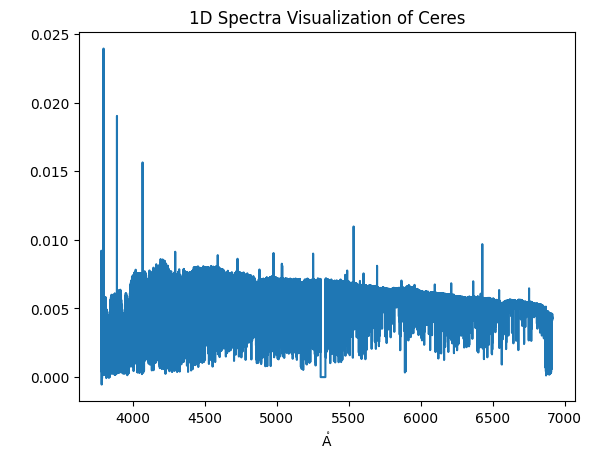

In [27]:
from astropy.visualization import quantity_support
import matplotlib.pyplot as plt
quantity_support() # NOTE: we use quantity_support to numerically convert the values before plotting them using matplotlib 
fig, ax = plt.subplots()
plt.title("1D Spectra Visualization of Ceres")
ax.step(spectra.spectral_axis, spectra.flux)

## Exercise 1: Visualizing the Spectra of Ganymede
Ganymede is the largest moon of Jupiter and the largest moon in the entire solar system. In this exercise, you will be analyzing the spectra FITS data for Ganymede and visualizing it using `matplotlib` and `specutils`.

![https://cdn.mos.cms.futurecdn.net/TM4enFnEmbQzdcQaHKToV3.jpg](https://cdn.mos.cms.futurecdn.net/TM4enFnEmbQzdcQaHKToV3.jpg)

[Image Source](https://www.space.com/16440-ganymede-facts-about-jupiters-largest-moon.html)

#### Objectives:
- Import the FITS file for Ganymede (`ganymede.fits`) using `fits` from `astropy.io`
- Print out general info and header data about the FITS file
- Use the `Spectrum1D` function from `specutils` to interpret the data
- Plot the spectra using `matplotlib`

## Satellite Imagery
There are hundreds of satellites within orbit that capture images of the Earth's surface. These satellites are responsible for conducting a wide range of remote sensing tasks such as environmental monitoring, weather forecasting, urban planning, agriculture, disaster response, and scientific research.

Compared to normal cameras, which are limited to capturing optical information, satellites are equipped with multiple sensors capable of detecting various parts of the electromagnetic spectrum, including visible and near-infrared light. This enhanced capability enables satellites to gather a wealth of information about the Earth, ranging from climate patterns and geographical events to vegetation health, land cover changes, and atmospheric composition.

### Example Satellites
Some satellites that conduct remote sensing include:
- **Landsat**: Landsat satellites are NASA-operated satellites that capture multispectral imagery, allowing for climate monitoring
- **Sentinel**:: Sentinel is part of the ESA program and provides a wide range of Earth observation data for environmental monitoring, climate change studies, and emergency response
- **GOES**: Geostationary Operational Environmental Satellites (GOES) operated by NOAA provide continuous monitoring of weather patterns

![https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTvpm4HdE2i1_5eqqK2Gl2Wc7OcSDtBl9KM4Fnl-FbCEw&s](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTvpm4HdE2i1_5eqqK2Gl2Wc7OcSDtBl9KM4Fnl-FbCEw&s)

[Image Source](https://earth.esa.int/eogateway/missions/landsat)

## Satellite Imagery Data Formats
Unlike the file formats we've discussed previously, images captured by Earth-observing satellites fall within the geospatial category. This means we'll be working with another type of data called `TIFF` that's closely tied to geographic information.

The TIFF (Tagged Image File Format) is a widely used file format for storing raster graphics and images. It's a flexible format that supports various types of data, including spatial raster and vector data used in geospatial satellite imagery.

Satellite images are stored as rasters where each image is represented by a grid of pixels each corresponding to a specific value (usually how much light is reflected off the surface of Earth). 

![https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/GUID-6754AF39-CDE9-4F9D-8C3A-D59D93059BDD-web.png](https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/GUID-6754AF39-CDE9-4F9D-8C3A-D59D93059BDD-web.png)

[Image Source](https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/what-is-raster-data.htm)

In order to read and process TIFF files for our Python applications we can use a library called `earthpy`

Another core component of satellite imagery is bands. Bands are individual channels or spectral bands in which the satellite sensor collects data. Each band captures information within a specific range of the electromagnetic spectrum.

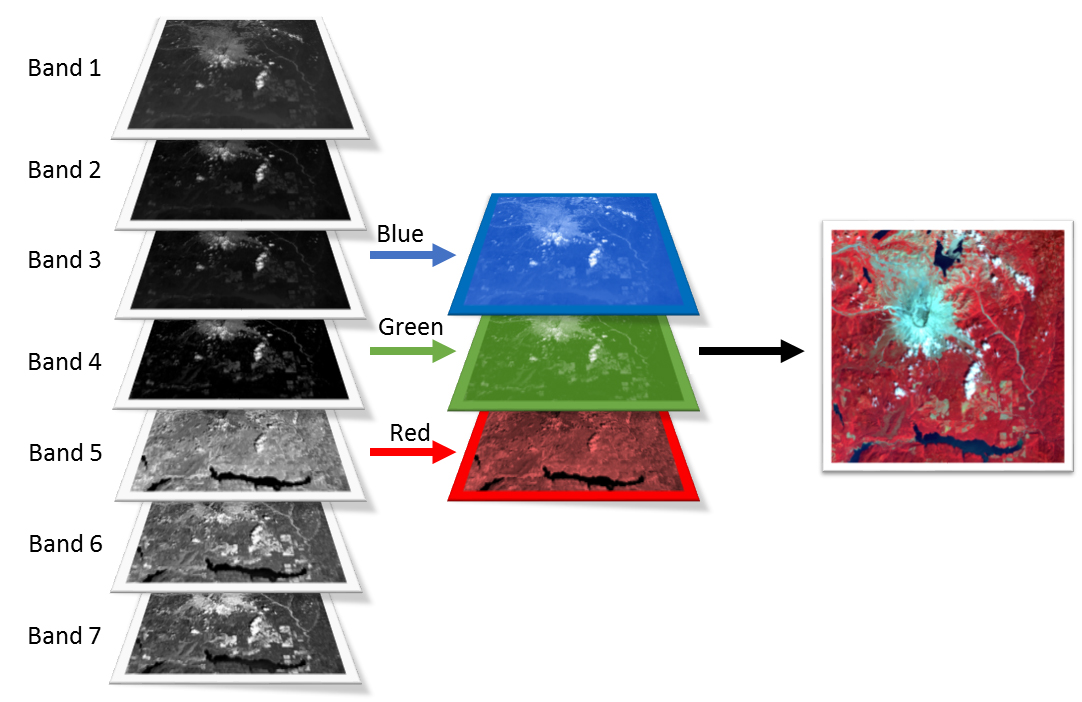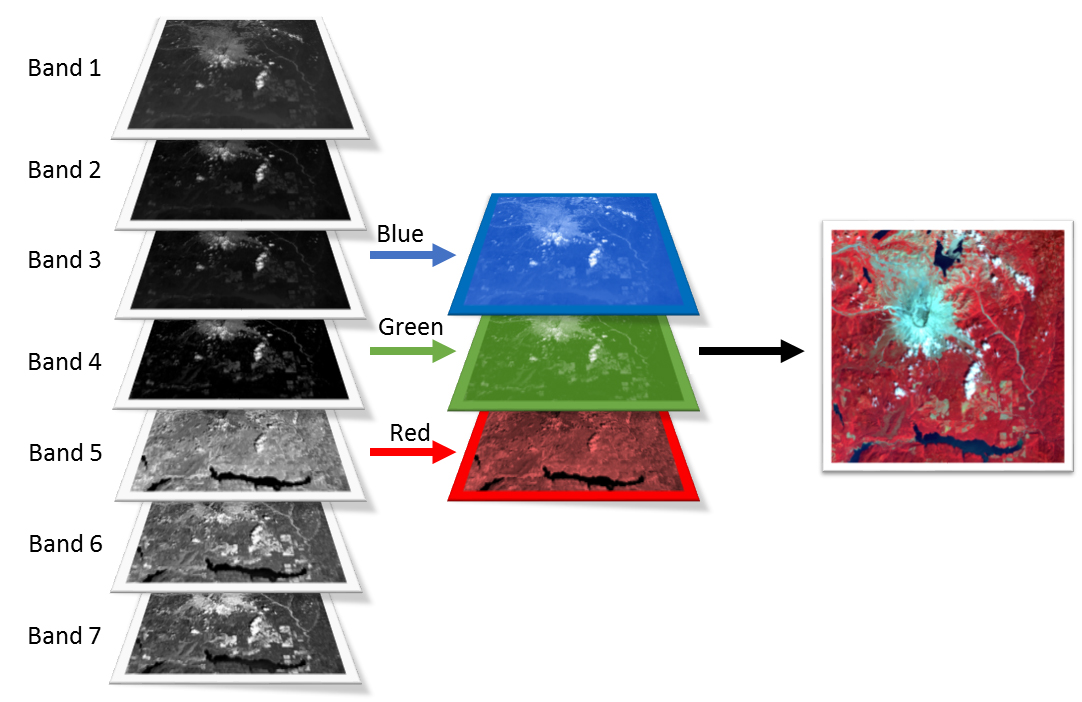

[Image Source](https://gsp.humboldt.edu/olm/Courses/GSP_216/lessons/composites.html)

## Analyzing Satellite Images using earthpy
We can use a Python library called `earthy` to conduct imagery analysis on photos captured by remote sensing satellites!

earthpy is a library that makes it easy to plot and work with spatial raster and vector data.

You can learn more about it here:
[https://earthpy.readthedocs.io/en/latest/](https://earthpy.readthedocs.io/en/latest/).

Let's try using earthpy to plot bands of a satellite image and create some visualizations!

In [38]:
import numpy as np
from glob import glob
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

### Importing Band TIFF Data
We can start off by importing the band data collected by a satellite. Each band is stored within a `TIFF` file. We can import all of these band files in bulk using the `glob` function.

In [41]:
np.seterr(divide='ignore', invalid='ignore')
bands = glob("./satellite-bands/*B?*.tiff")
bands.sort()

### Visualizing Band Data
We can now visualize each of the band files by processing the contents using `rasterio` and `numpy`

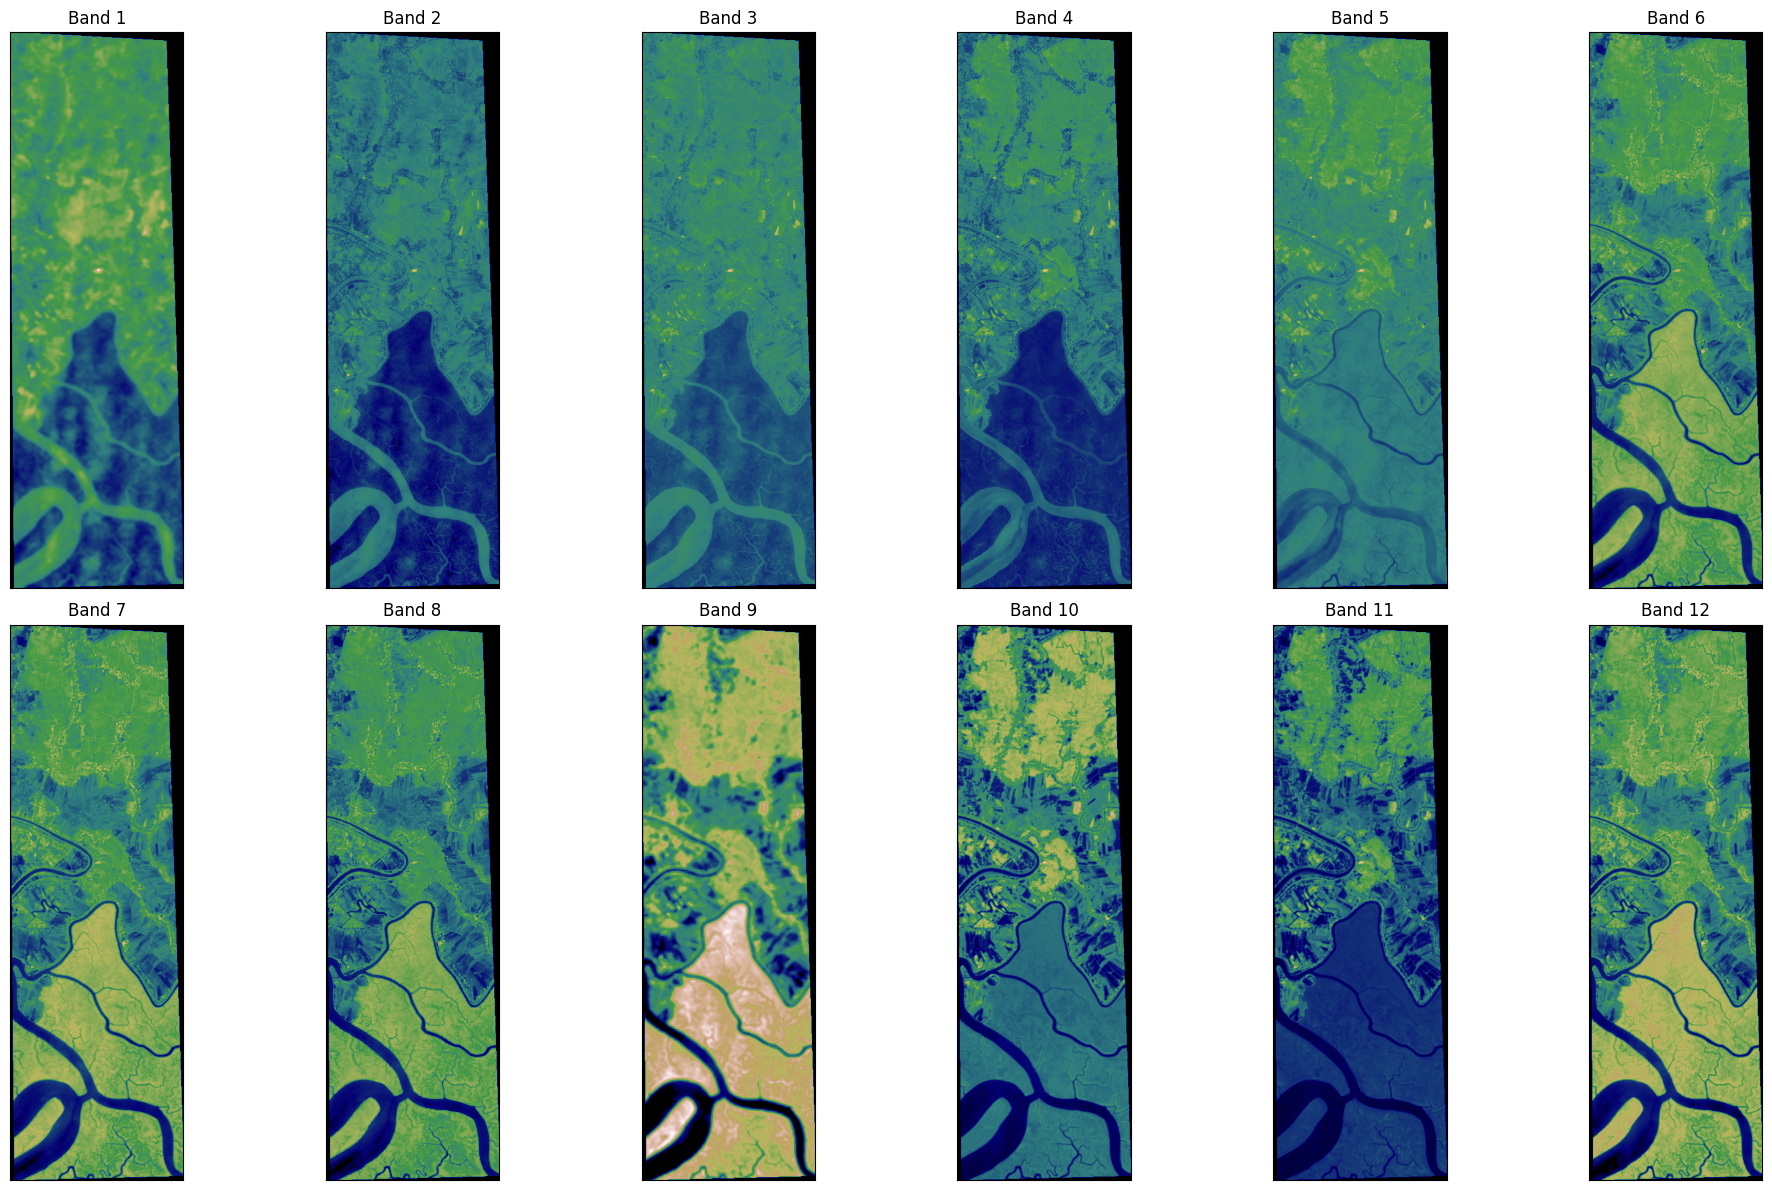

In [47]:
data = []
for band in bands:
    with rio.open(band, 'r') as file:
        data.append(file.read(1))
stack_data = np.stack(data)
ep.plot_bands(stack_data, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

### Generating a RGB Composite Image
A RGB Composite Image is a satellite image where the band data from three spectral bands (Red, Green, and Blue) are combined to create a single color image. This is a standard practice in remote sensing and satellite imaging as it is similar to how the human eye perceives color.

We can create a RGB composite of our satellite by using this band information:

`Red` = Band #3

`Green` = Band #2

`Blue` = Band #1

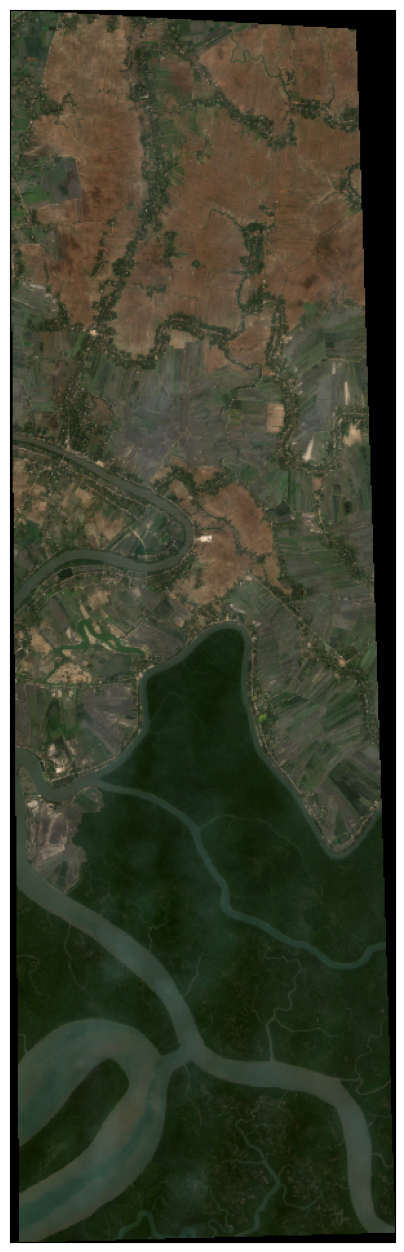

In [48]:
rgb = ep.plot_rgb(stack_data, 
                  rgb=(3,2,1), 
                  figsize=(10, 16))
plt.show()

## Exercise 2: Generate a False Color Composite
You are an accredited geospatial remote sensing analyst and are given the task of processing satellite bands to create a false color composite image. A False Color Composite is a band combination that enhances vegetation and helps in distinguishing between healthy and stressed vegetation.

#### Objectives:
- Import the same Sentinel Satellite bands as above using `glob` and sort them
- Process the data using `rasterio` and then place it using a `numpy` stack
- Plot the False Color Composite using `earthpy`

#### HINT
The False Color Composite is created using a combination of NIR (Near Infrared), Red, and Green bands.

Band breakdown:

`Near Infrared` = Band #4

`Red` = Band #3

`Green` = Band #2

Great work! In this lesson, we covered the essential libraries you will need to conduct your own imagery analysis for aerospace applications. In the last lesson of this course, we will be covering how to create your own simulations!